In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
import sys
from tqdm import tqdm
import utils, models
import torch.nn.functional as F
import math
import random

/home/toni/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_set = pd.read_csv("Data/training_set.csv")
training_set_metadata = pd.read_csv("Data/training_set_metadata.csv")

print(training_set.shape, training_set_metadata.shape)

(1421705, 6) (7848, 12)


In [3]:
data_obj, label = utils.load_passbands_list(path = "Data/Data_as_h5/obj_passbands.h5", objid = 615, path_enter = "Data/")

In [4]:
data_obj[0].shape

torch.Size([63, 2])

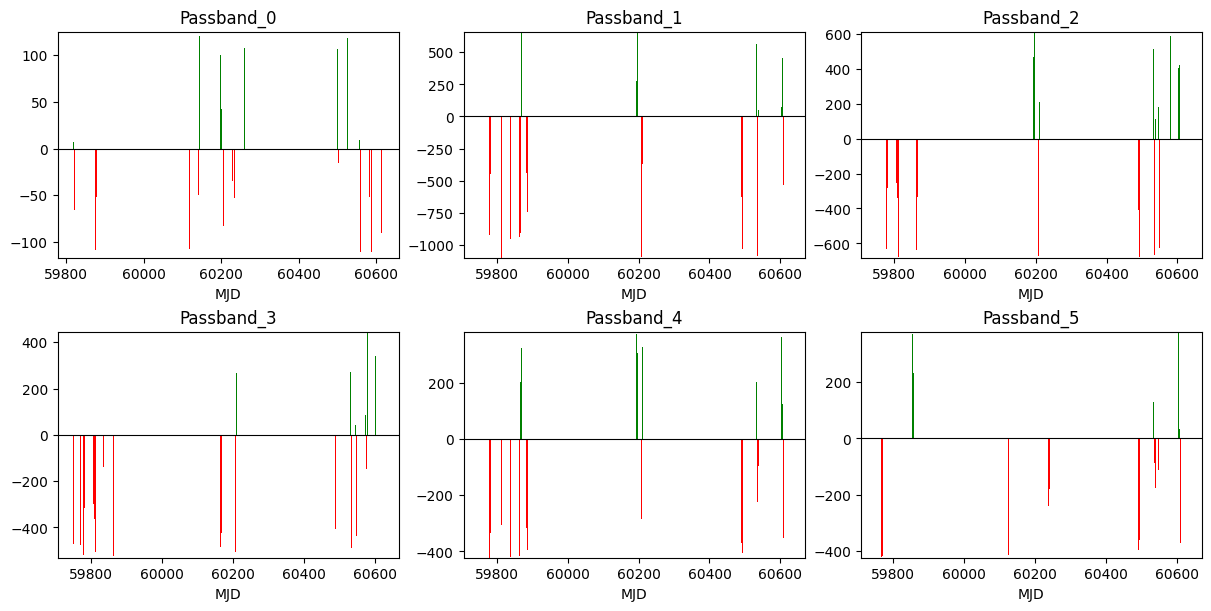

In [5]:
utils.plot_passbands(data_obj)

In [6]:
data_obj_pre = utils.preprocess_data_obj(data_obj)
data_obj_pre.shape

torch.Size([2, 352, 6])

In [7]:
all_objects, labels = utils.get_sets(path_enter = "Data/")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7848/7848 [03:37<00:00, 36.00it/s]


In [8]:
len(all_objects)

7848

In [11]:
X_training, Y_training, X_val, Y_val, X_test, Y_test = utils.split_sets(all_objects, labels)

In [15]:
X_training[1].shape

torch.Size([1, 352, 6])

In [19]:
# Define model
input_dim = 6
n_classes = 14
d_model = 64
nhead = 4
num_layers = 2

model = models.TransformerClassifier(input_dim, n_classes, d_model, nhead, num_layers)

In [20]:
output = model( X_training[0] )

In [21]:
output.shape

torch.Size([1, 14])

In [22]:
output

tensor([[0.0931, 0.0747, 0.1267, 0.0744, 0.0877, 0.0612, 0.0634, 0.0873, 0.0535,
         0.0523, 0.0516, 0.0607, 0.0631, 0.0501]], grad_fn=<SoftmaxBackward0>)